In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 라이브러리를 사용하지 않고 직접 구현한 함수 사용
from common.dataset import Spiral
from common.optimizer import SGD
from common.layer import Sigmoid, Affine, MatMul, SoftmaxWithLoss
from common.net import TwoLayerNet
from common.function import softmax, cross_entropy_error
from common.trainer import Trainer

In [2]:
!pyenv version

dss (set by PYENV_VERSION environment variable)


## Dataset `Spiral`

In [3]:
dataset = Spiral()
x, t = dataset.load_data()
print(x.shape, t.shape)

(300, 2) (300, 3)


- 300개의 2 featrues를 가진 데이터 생성
- 300개의 데이터는 3개의 class로 나누어진다.

## Layer `Affine`
- 완전연결계층 : $z = Wx + b$

In [4]:
W = np.random.randn(2, 4)
b = np.random.randn(1, 4)

affine_layer = Affine(W, b)

#### `forward()`

In [5]:
affine_out = affine_layer.forward(x)
print(affine_out.shape)
affine_out

(300, 4)


array([[-0.02837987, -0.53012899,  0.93811912,  1.44211415],
       [-0.02638738, -0.52379702,  0.93402608,  1.44288594],
       [-0.02612095, -0.50990207,  0.92578972,  1.43963234],
       ...,
       [ 0.45772701, -1.81642436,  1.60784604,  2.35873717],
       [ 0.4151736 , -1.37238156,  1.35390762,  2.19322996],
       [ 0.38942033, -1.14967738,  1.22734883,  2.10490689]])

#### `backward()`

In [6]:
dout = np.random.randn(300, 4)

affine_layer.backward(dout).shape

(300, 2)

## Layer `Sigmoid`
- sigmoid 계층 : $a = sigmoid(z)$

#### `forward()`

In [7]:
sigmoid_layer = Sigmoid()

sigmoid_out = sigmoid_layer.forward(affine_out)
print(sigmoid_out.shape)
sigmoid_out

(300, 4)


array([[0.49290551, 0.3704868 , 0.71871957, 0.80878183],
       [0.49340354, 0.37196479, 0.71789137, 0.80890116],
       [0.49347013, 0.37521648, 0.71622033, 0.80839771],
       ...,
       [0.61247482, 0.13986347, 0.83311212, 0.9136262 ],
       [0.60232776, 0.20223534, 0.79476774, 0.89963991],
       [0.59614315, 0.24054802, 0.77335422, 0.89137919]])

#### `backward()`

In [8]:
dout = np.random.randn(300, 4)

sigmoid_layer.backward(dout).shape

(300, 4)

## Net `TwoLayerNet`

- 1층 : `Affine()`, `Sigmoid()`


- 2층 : `Affine()`

In [9]:
input_size = 2
hidden_size = 4
output_size = 3

model = TwoLayerNet(input_size, hidden_size, output_size)
model

In [10]:
model.params

[array([[ 0.27725395, -1.1984172 , -1.60785104, -0.26325502],
        [-0.53865033, -0.77738062,  1.42648582,  1.73574814]]),
 array([ 1.18685601, -0.21685566,  0.03889043,  1.04370841]),
 array([[ 0.65556093, -1.14438169, -1.82662574],
        [-0.55864187,  0.70828449, -0.3492433 ],
        [-0.50515086, -0.69047045,  1.77390517],
        [-0.22669244, -1.49770221,  0.50534707]]),
 array([-1.56520622,  0.24386752,  2.8749947 ])]

In [11]:
y = model.predict(x)
print(y.shape)

(300, 3)


In [12]:
model.forward(x, t)

2.8811070129179925

In [13]:
model.backward().shape

(300, 2)

## function `softmax`

In [14]:
y = softmax(y)
y.shape

(300, 3)

## function `cross_entropy_error`

In [15]:
cross_entropy_error(y, t)

2.8811070129179925

## Layer `MatMul`
- 내적(dot) 계층 : $z = Wx$

In [16]:
matmul_layer = MatMul(W)
matmul_layer

#### `forward()`

In [17]:
matmul_layer.forward(x).shape

(300, 4)

#### `backward()`

In [18]:
dout = np.random.randn(300, 4)

matmul_layer.backward(dout).shape

(300, 2)

## Layer `SoftmaxWithLoss`

In [19]:
softmax_with_loss_layer = SoftmaxWithLoss()
softmax_with_loss_layer

In [20]:
softmax_with_loss_layer.forward(y, t)

1.204894230936723

In [21]:
softmax_with_loss_layer.backward().shape

(300, 3)

---

## Train

#### hyper parameter setting

In [22]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1

In [23]:
spiral = Spiral()
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
model

In [24]:
optimizer = SGD(lr=learning_rate)
optimizer

In [25]:
data_size = len(x)
max_iters = data_size // batch_size
curr_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    
    # shuffle data
    idx = np.random.permutation(data_size)
    shuffle_x = x[idx]
    shuffle_t = t[idx]
    
    for iters in range(max_iters):
        batch_x = shuffle_x[iters*batch_size:(iters+1)*batch_size]
        batch_t = shuffle_t[iters*batch_size:(iters+1)*batch_size]
        
        # loss
        loss = model.forward(batch_x, batch_t)
        
        # back propagation
        model.backward()
        
        # update gradient
        optimizer.update(model.params, model.grads)
        
        curr_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = curr_loss / loss_count
            loss_list.append(avg_loss)
            curr_loss, loss_count = 0, 0
        
            if ((epoch+1) % 10 == 0):
                print("epoch %d | step %d / %d | loss %.2f" % (epoch+1, iters+1, max_iters, avg_loss))

epoch 10 | step 10 / 10 | loss 0.77
epoch 20 | step 10 / 10 | loss 0.74
epoch 30 | step 10 / 10 | loss 0.69
epoch 40 | step 10 / 10 | loss 0.61
epoch 50 | step 10 / 10 | loss 0.56
epoch 60 | step 10 / 10 | loss 0.45
epoch 70 | step 10 / 10 | loss 0.38
epoch 80 | step 10 / 10 | loss 0.31
epoch 90 | step 10 / 10 | loss 0.29
epoch 100 | step 10 / 10 | loss 0.24
epoch 110 | step 10 / 10 | loss 0.21
epoch 120 | step 10 / 10 | loss 0.20
epoch 130 | step 10 / 10 | loss 0.18
epoch 140 | step 10 / 10 | loss 0.17
epoch 150 | step 10 / 10 | loss 0.15
epoch 160 | step 10 / 10 | loss 0.14
epoch 170 | step 10 / 10 | loss 0.14
epoch 180 | step 10 / 10 | loss 0.14
epoch 190 | step 10 / 10 | loss 0.13
epoch 200 | step 10 / 10 | loss 0.12
epoch 210 | step 10 / 10 | loss 0.13
epoch 220 | step 10 / 10 | loss 0.11
epoch 230 | step 10 / 10 | loss 0.11
epoch 240 | step 10 / 10 | loss 0.11
epoch 250 | step 10 / 10 | loss 0.10
epoch 260 | step 10 / 10 | loss 0.10
epoch 270 | step 10 / 10 | loss 0.10
epoch 280 

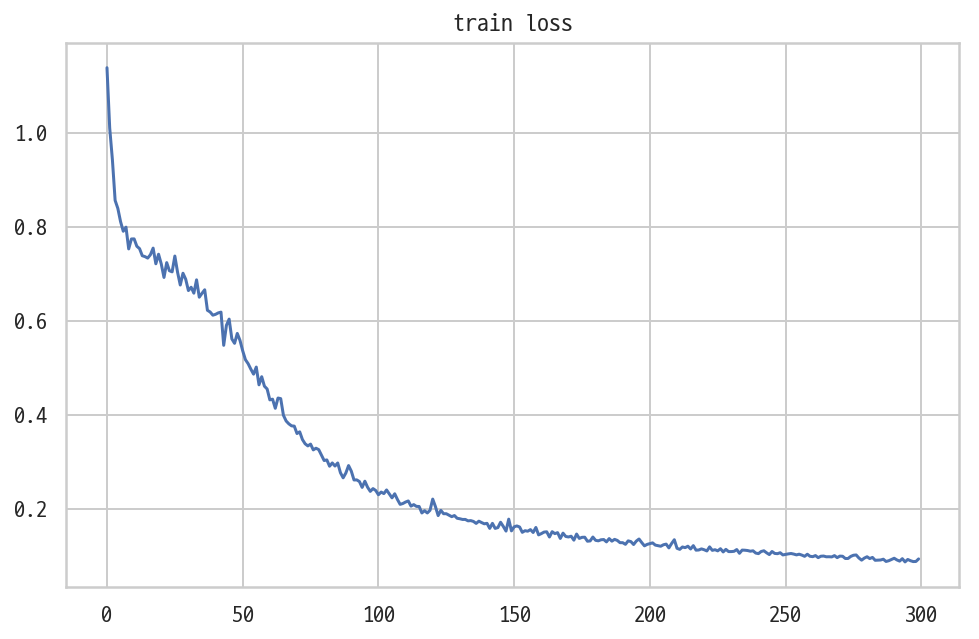

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(loss_list)
plt.title("train loss")
plt.show()

## `trainer`

In [27]:
max_epoch = 300
bartch_size = 30
gidden_size = 10
learning_rate = 1

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, log_step=10, epoch_log_step=30)

time 0s | epoch 30 | step 10 / 10 | loss 0.69
time 0s | epoch 60 | step 10 / 10 | loss 0.45
time 0s | epoch 90 | step 10 / 10 | loss 0.29
time 0s | epoch 120 | step 10 / 10 | loss 0.20
time 0s | epoch 150 | step 10 / 10 | loss 0.15
time 0s | epoch 180 | step 10 / 10 | loss 0.14
time 0s | epoch 210 | step 10 / 10 | loss 0.13
time 0s | epoch 240 | step 10 / 10 | loss 0.11
time 0s | epoch 270 | step 10 / 10 | loss 0.10
time 0s | epoch 300 | step 10 / 10 | loss 0.09


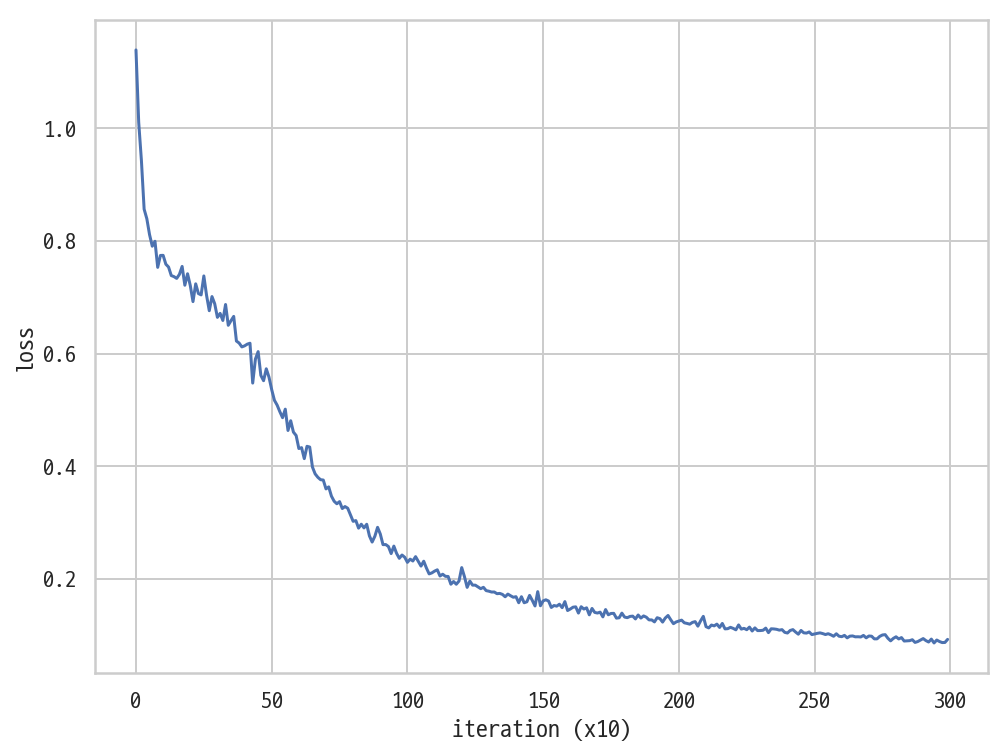

In [28]:
trainer.plot()